<a href="https://colab.research.google.com/github/akfangus/DeepProject/blob/main/ASL_prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from torch.utils.data import Dataset, DataLoader
# import os
# import torch
# from glob import glob
# import matplotlib.pyplot as plt
# from PIL import Image

# import torchvision.transforms as transforms
# import torchvision
# from torchvision import models

In [ ]:
import numpy as np
import os
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms,models,datasets
import matplotlib.pyplot as plt
from PIL import Image
from torch import optim
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import cv2
from glob import glob
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device =='cuda':
    torch.cuda.manual_seed_all(777)
print(device)

cuda


In [ ]:
%matplotlib inline

# Dataloader의 필요성
- 자신의 이미지를 가지고 학습 시켜 자신의 프로젝트를 진행하기 위해 사용하는 라이브러리
- 본인이 가지고 있는 디렉터리 구조를 로드

## 대략적 구조
- 학습하고자 하는 데이터 셋에 Dataset클래스로 정의
- Dataloader 클래스에 인수로 줌
- network에서 우리의 데이터를 사용할 수 있음.

## PyTorch의 Dataset과 DataLoader를 이용하면 학습을 위한 방대한 데이터를 미니배치 단위로 처리할 수 있고, 데이터를 무작위로 섞음으로써 학습의 효율성을 향상시킬 수 있다. 또한 데이터를 여러개의 GPU를 사용해 병렬처리로 학습할 수도 있다. 아래의 코드는 Dataset과 DataLoader를 사용하지 않고 매 에폭마다 학습 데이터 전체를 입력해 학습하는 코드이다.

# Dataset

In [ ]:
path = []
# os.listdir = 경로에 포함되는 모든 디렉토리를 읽음
for i in os.listdir('/content/drive/MyDrive/Colab Notebooks/ASL/ASL Alphabet/asl_alphabet_train/asl_alphabet_train'):
  print(i)
  # glob = 경로의 지종파일을 읽음.
  for files in glob(f'/content/drive/MyDrive/Colab Notebooks/ASL/ASL Alphabet/asl_alphabet_train/asl_alphabet_train/{i}/*'):
    path.append(files)

T
U
Y
Z
V
X
R
S
space
W
J
P
L
Q
N
K
I
M
O
nothing
C
del
D
H
A
F
B
E
G


In [ ]:
# path

In [ ]:
#{} 딕셔너리, 형태로 해당 경로에 있는 디렉토리를 sorting한다음에 인덱스순서대로 딕셔너리화
cmap = {v:i for i,v in enumerate(sorted(os.listdir('/content/drive/MyDrive/Colab Notebooks/ASL/ASL Alphabet/asl_alphabet_train/asl_alphabet_train')))}

In [ ]:
cmap

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

In [ ]:
class ASL(Dataset):
    def __init__(self,path,cmap):
      # 클래스 초기화 함수 ASK(path, cmap)값을 넣어서 초기설정
        self.path = path
        self.normalize = transforms.Normalize(mean = [0.485,0.456,0.406],std = [0.229,0.224,0.225])
        self.cmap = cmap
    def __len__(self):
      # 길이를 return 하게해주는함수 len()을 쓸수있게됨
        return len(self.path)
    
    def __getitem__(self,ix):
      # 인덱스로 값을 출력할수 있게 해주는 함수
        # opencv로 이미지를 읽어옴 opencv는 RGB가 아니라 BGR형식이기때문에 이미지에서 [:,:,::-1]로 채널을 거꾸로 읽어준다고한다.
        im = cv2.imread(self.path[ix])[:,:,::-1]
        # VGG16은 224,224를 인풋으로 받아온다고함.
        im = cv2.resize(im,(224,224))
        # 입력으로 하기위한 텐서변환.
        im = torch.tensor(im/255)
        # 인풋의 shape가 (width, height, channel)로 되어있는데 이걸 (channel, width, height) 형태로 변경해야하기 때문에 permute()함수를 씀.
        im = im.permute(2,0,1)
        # Nomalize init에서 선언한거 실행
        im = self.normalize(im)
        # 이미지 타겟 mapping하기위해 디렉토리에서 값을 뽑아옴
        target = self.path[ix].split("/")[-2]
        # 매핑된값 label로 저장,
        label = cmap[target]
        
        return im.float().to(device),torch.tensor(int(label)).long().to(device)    

In [ ]:
# tensor (3,224,224)retuen
data[0][0]
# label tensor화하여 return
data[0][1]

tensor(19, device='cuda:0')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(19, device='cuda:0')


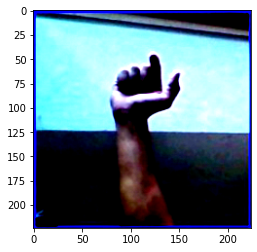

In [ ]:
data = ASL(path,cmap)

im,label = data[0]
# (3,224,224)로 되어있는거 (224,224,3)으로 변경해주기위한 permute()함수
plt.imshow(im.cpu().permute(1,2,0))
print(label)

In [ ]:
im,label = data[20000]
plt.imshow(im.cpu().permute(1,2,0))
print(label)

In [ ]:
from random import shuffle
from random import seed

In [ ]:
len(path)

86999

In [ ]:
seed(42) # 시드고정
shuffle(path) # 저장된 이미지 path 셔플

# 87000데이터니까 얼추 75000개로 나눠서 검증셋만들기
train = path[:75000]
val = path[75000:]
# data불러오기
train_data = ASL(train,cmap)
val_data = ASL(val,cmap)
# dataloader로 많은양의 데이터를 minibatch로 나누어서 진행 할수 있게 한다.
train_dl = DataLoader(train_data, batch_size=32, shuffle=True, drop_last=True)
val_dl = DataLoader(val_data, batch_size=32, shuffle=False, drop_last=True)

In [ ]:
# 모델을 만들어보자
# vgg16 선언.
model = models.vgg16(pretrained=True)

In [ ]:
# 모델의 일부를 고정하고 나머지를 훈련하려는 경우 고정하려는 매개변수의 requires_grad를 False로 설정.
# 이경우는 전체 고정시키고 avgpool classifier를 재선언한 모델로 결국 Convolution 만 고정하려는 목적인거같다.
for param in model.parameters():
  param.requires_grad  = False

# 원래는 (7,7)인데 (1,1)로 원본 그대로를? 하는건가?
model.avgpool = nn.AdaptiveAvgPool2d(output_size=(1,1))

model.classifier = nn.Sequential(
    # 일자 벡터화
    nn.Flatten(),
    nn.Linear(512,128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128,29),
    nn.Softmax()
)

In [ ]:
# loss function = CrossEntropy => 다중 클래스 분류에 자주 사용되는 Loss function => log_softmax와 nll_loss가 하나의 함수로 합쳐진 형태라고함.

# optimizer = Adam ==> Adam method는 Adagrad + RMSProp
# Adam은 stepsize가 gradient의 rescaling에 영향 받지않아 gradient가 커져도 stepsize는 bound 되어있어 어떠한 objectfunction을 사용한다 하더라도 안정적으로 최적화를 위한 하강이 가능하다고 한다.
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
!pip install torch-summary

In [ ]:
from torchsummary import summary
# 만들어진 모델 어떻게 돌아가는지 테스트 및 성능 해보는거같음.
summary(model, torch.zeros(1,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        (1,792)
|    └─ReLU: 2-2                         [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        (36,928)
|    └─ReLU: 2-4                         [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       (73,856)
|    └─ReLU: 2-7                         [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       (147,584)
|    └─ReLU: 2-9                         [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 256, 56, 56]         (295,168)
|    └─ReLU: 2-12                        [-1, 256, 56,

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        (1,792)
|    └─ReLU: 2-2                         [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        (36,928)
|    └─ReLU: 2-4                         [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       (73,856)
|    └─ReLU: 2-7                         [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       (147,584)
|    └─ReLU: 2-9                         [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 256, 56, 56]         (295,168)
|    └─ReLU: 2-12                        [-1, 256, 56,

In [ ]:
model.features.get_parameter

In [ ]:
# for data, target in train_dl:
#   print(data, target)
len(train_dl)

2343

In [ ]:
# 이제 학습 시켜보자
train_losses, valid_losses = [],[]
# 15epoch 수행 예정
n_epochs=15

for epochs in range(n_epochs):
  # train, val loss값 초기화
  train_loss=0.0
  val_loss=0.0
  # 모델을 학습 모드로 변환 / 평가 모드는 model.eval() 로 할 수 있다.
  model.train()
  for data, target in train_dl:
    # 파이토치는 미분을 통해 얻은 기울기를 이전에 계산된 기울기 값에 누적시키는 특징이 있습니다
    # 그렇기 때문에 optimizer.zero_grad()를 통해 미분값을 계속 0으로 초기화
    optimizer.zero_grad()
    # data에 대한 예측값 생성
    prediction = model(data)
    # 예측과 target에 대한 loss function수행
    loss = loss_fn(prediction, target)
    # loss에 backwoar()를 계산하면 모델을 구성하는 파라미터에 대한 gradient를 계산한다.
    # backward()는 암묵적으로 loss값이 스칼라라고 가정하기때문에 scalar값으로 만들어주어야함.
    # backpropagation으로 하는듯.
    loss.backward()
    # optimizer가 step()메소드를 통해 parameter를 업데이터한다.
    optimizer.step()
    train_loss += loss.item() * data.size(0)

  # batch normalization 이나 dropout이 들어있는 모델은 batchsize에 따라 결과가 달라진다던가 실행 시킬때마다 결과가 달라져 학습에 영향을 미침 (드롭아웃 및 배치 정규화를 평가 모드로 설정하여야 합니다. 이것을 하지 않으면 추론 결과가 일관성 없게 출력)
  # 훈련후 결과 계산만을 위해 model.eval()을 실행 시켜줘야한다고함.
  model.eval()

  for data, target in val_dl:
    prediction = model(data)
    loss = loss_fn(prediction, target)
    val_loss += loss.item() * data.size(0)
  
  # for문에서 train_loss에 모든 loss의 합을 더햇으므로 최종 loss는 갯수만큼 나눠야겟죠?
  train_loss = train_loss / len(train_dl.sampler)
  val_loss = val_loss / len(val_dl.sampler)

  # loss 리스트에 append
  train_losses.append(train_loss)
  valid_losses.append(val_loss)

  print("Epoch : {} \tTraining Loss: {:.6f} \tValidation Loss {:.6f}".format(epochs,train_loss,val_loss))


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


KeyboardInterrupt: ignored

In [ ]:
# 훈련이 끝났으니 test셋에 대해 이미지 데이터로드
class ASLTest(Dataset):
  # 초기화
    def __init__(self,path,cmap):
        self.path = path
        self.normalize = transforms.Normalize(mean = [0.485,0.456,0.406],std = [0.229,0.224,0.225])
        self.cmap = cmap
    def __len__(self):
        return len(self.path)
    
    def __getitem__(self,ix):
        im = cv2.imread(self.path[ix])[:,:,::-1]
        im = cv2.resize(im,(224,224))
        im = torch.tensor(im/255)
        im = im.permute(2,0,1)
        im = self.normalize(im)
        target = self.path[ix].split("/")[-1].split("_")[0]
        label = cmap[target]
        
        return im.float().to(device),torch.tensor(int(label)).long().to(device)    

In [ ]:
# test 이미지들 path 가져오기
test_path = glob('/content/drive/MyDrive/Colab Notebooks/ASL/ASL Alphabet/asl_alphabet_test/asl_alphabet_test/*')
# 데이터 로드를위한 클래스
test_data = ASLTest(test_path,cmap)
# 데이터로더
test_dl = DataLoader(test_data, batch_size=16, shuffle=False)

# acc 측정을 위한 정답수
correct = 0
# 전체
total = 0

#no_grad() with statement에 포함시키게 되면 Pytorch는 autograd engine을 꺼버린다
# 더이상 자동으로 garient를 트래킹하지않음
# autograd를 끔으로써 메모리사용량을 줄이고 속도를 높힘.
with torch.no_grad():
  for data in test_dl:
    images, labels = data
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct +=(predicted == labels).sum().item()


print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

In [ ]:

# 결과 출력
for i  in range(len(test_path)):
    images,labels = test_data[i]
    plt.imshow(images.permute(1,2,0).cpu())
    plt.title(labels.cpu().numpy())
    plt.show()

    batch = images.unsqueeze(0)
    model.eval()
    with torch.no_grad():
        output = model(batch)
        output = torch.argmax(output,1)
        print(f"Predicted is {output.cpu().numpy()[0]}")

In [ ]:
ㅂ3가ㅓㄷㅈ렂대려0ㄷㅁ너래ㅑㅁㄴ더리ㅏㅁ너리ㅏㅁㄴ어ㅣㅁ;너리마너리ㅏㅁㄴ러ㅣㅁ너래ㅑㅈㅁ더래ㅑ저리ㅏㄴ어ㅣㅏㄻㄴ이ㅏ럼ㄴ
너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!
너무느려!!!!!!!!!!!!!!!!!
너무느려!!!!!!!!!!!!!!!!!
너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!
너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!
너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!
너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!너무느려!!!!!!!!!!!!!!!!!

SyntaxError: ignored

In [ ]:
len(train_dl.sampler)

75000

In [ ]:
transfrom_train = transforms.Compose([
      transforms.Resize((200,200)),
      transforms.ToTensor(),
      transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

In [ ]:
trainset = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/Colab Notebooks/ASL/ASL Alphabet/asl_alphabet_train/asl_alphabet_train',
                                            transform=transfrom_train)

In [ ]:
trainset

Dataset ImageFolder
    Number of datapoints: 86999
    Root location: /content/drive/MyDrive/Colab Notebooks/ASL/ASL Alphabet/asl_alphabet_train/asl_alphabet_train
    StandardTransform
Transform: Compose(
               Resize(size=(200, 200), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [ ]:
class MyDataSet(Dataset):
  
  def __init__(self):
    pass
    # 인자를 받아 인스턴스 변수를 초기화 

  def __len__(self):
    # 데이터 셋의 길이를 리턴한다.
    return len()

  def __getitem__(self):
  # 학습 이미지와 이미지의 GT를 리턴한다.
    return traning_data, ground_truth